# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Which state has above average act score with low participation rate.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Reading act_2018.csv using pandas
act_2017 =  pd.read_csv("act_2017.csv")
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [3]:
#Code:
#Reading sat_2018.csv using pandas
sat_2017 = pd.read_csv("sat_2017.csv")
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#to display 10 rows of sat_2017 csv file using .head() inbuilt function
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
#Code: to display 10 rows of sat_2017 csv file using .head() inbuilt function
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [7]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 4a. Does the data look complete? 

Answer: both tables has no null object

In [8]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [9]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [10]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

ACT TEST

The highest possible score you can earn on the ACT is 36 (on a scale of 1-36). 
This 36 is a composite, or average, of your four subject area scores
—English, Reading, Math, and Science.
Each section is also scored on a scale of 1-36.

SAT TEST

The SAT is scored on a 200 to 800 scale in each section in 10 point increments.
The 2 sections (Evidence-Based Reading and Writing and Math) will have scores provided separately.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [12]:
#In ACT test, the scores of all the subjects must be in between 1 to 36.
#So, we are checking each subject is in that range

In [13]:
#code
act_2017[~act_2017['English'].between (1,36)] | act_2017[~act_2017['Math'].between (1,36)] |act_2017[~act_2017['Reading'].between (1,36)] | act_2017[~act_2017['Science'].between (1,36)] 

,State,Participation,English,Math,Reading,Science,Composite


In [14]:
#In SAT test, the scores of all the subjects must be in between 200 to 800.
#So, we are checking each subject is in that range

In [15]:
sat_2017[~sat_2017['Evidence-Based Reading and Writing'].between (200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [16]:
sat_2017[~sat_2017['Math'].between (200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [17]:
# We can see that in SAT 2017, Math Score is out of range. We need to fix the error.
# Maths score = Total - Evidence-Based Reading and Writing

In [18]:
sat_2017.at[20, 'Math'] = 524

In [19]:
sat_2017.loc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [20]:
act_2017.dtypes


State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [21]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Since everything in Python is an Object, every variable holds an object instance. ... Objects of built-in types like (int, float, bool, str, tuple, unicode) are immutable. Objects of built-in types like (list, set, dict) are mutable. Custom classes are generally mutable.

Answer : From the above, we understand that the 'State', 'Participation' column has 'String' and 'int' type but we get it has an 'object' for both sat_2017 and act_2017 data frames.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [22]:
act_2017['Participation'] = act_2017['Participation'].replace('%','',regex = True)


In [23]:
act_2017['Participation'].head()

0     60
1    100
2     65
3     62
4    100
Name: Participation, dtype: object

In [24]:
# converts 'object' datatype to 'Integer'
act_2017['Participation'] = act_2017['Participation'].apply(pd.to_numeric)

In [25]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [26]:
act_2017.tail()


,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29,23.5,23.3,24.6,23.5,23.8
48,Washington,29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


- Fix any individual values preventing other columns from being the appropriate type.

In the Composite column, Wyoming State has 20.2x value which is preventing the column to be float

- Finish your data modifications by making sure the columns are now typed appropriately.

In [27]:
act_2017.at[51, 'Composite'] = 20.2 #changed the value to float

In [28]:
act_2017 = act_2017.astype({"Composite": float})

In [29]:
#code
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29,23.5,23.3,24.6,23.5,23.8
48,Washington,29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2


- Display the data types again to confirm they are correct.

In [30]:
#Code:
act_2017['Composite'].dtypes

dtype('float64')

In [31]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [32]:
#df['column'] = df['column'].astype('str') 
act_2017['State'] = act_2017['State'].astype('str')

In [33]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [34]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [35]:
sat_2017['Participation'] = sat_2017['Participation'].replace('%','',regex = True)


In [36]:
# converts 'object' datatype to 'Integer' of Participation column
sat_2017['Participation'] = sat_2017['Participation'].apply(pd.to_numeric)

In [37]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [38]:
sat_2017['State'].head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

In [39]:
sat_2017['State'] = sat_2017['State'].astype('str')

In [40]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [41]:
rename_act_2017 = {
            'State': 'state', 'Participation':'participation_act_2017',
    'English':'english_act_2017', 'Math':'math_act_2017','Reading':'reading_act_2017',
    'Science':'science_act_2017', 'Composite':'composite_act_2017'
}

In [42]:
#code to rename the columns
act_2017 = act_2017.rename(columns=rename_act_2017)
act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [43]:
rename_sat_2017 = {
    'State': 'state', 'Participation':'participation_sat_2017',
    'English-Based Reading and Writing ':'english_based_reading_and_writing_sat_2017',
    'Math':'math_sat_2017','Total':'total_sat_2017'
}

In [44]:
sat_2017 = sat_2017.rename(columns=rename_sat_2017)
sat_2017.head()

,state,participation_sat_2017,Evidence-Based Reading and Writing,math_sat_2017,total_sat_2017
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|There are 17 states with 100% ACT participation—that's 34% of the country! These states have made the ACT a mandatory part of their statewide testing regimens, helping high school students be better prepared for their college applications.|
|participants_act_2017|Integer|ACT|This column gives us the percentage rate of participants in each state|
|english_act_2017|Integer|ACT|In ACT test, the score of English subject must be between 1 to 36
|math_act_2017| Integer | ACT | In ACT test, the score of Math subject must be between 1 to 36
|reading_act_2017| Integer|ACT| In ACT test, the score of reading subject must be between 1 to 36
|science_act_2017|Integer | ACT | In ACT test, the score of science subject must be between 1 to 36
|composite_act_2017| Integer | ACT | In ACT test, the score of composite  must be between 1 to 36

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|When colleges admit incoming students, they nearly always aim to compile a diverse class. One of the ways in which they consider this diversity is by geographical region. For this reason, you might find yourself competing with other students from your state for a seat at selective colleges, especially if many students from your state happen to be applying to the same school.|
|participants_sat_2017|Integer|SAT|This column gives us the percentage rate of participants in each state|
|evidence_based_reading_and_writing_sat_2017|Integer|SAT|In SAT test, the score of Evidence Based Reading and Writing subject must be between 200 to 800.|
|math_sat_2017| Integer | SAT | In SAT test, the score of Math subject must be between 200 to 800.|
|total_sat_2017| Integer|SAT| In SAT test, the total must be between 400 to 1600.|


 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [45]:
#code
# Checking for any row that has null value
#df[df.isnull().any(axis=1)]
act_2017[act_2017.isnull().any(axis = 1)]

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017


In [46]:
act_2017.drop([0],axis = 0, inplace = True)

In [47]:
sat_2017[sat_2017.isnull().any(axis = 1)]

,state,participation_sat_2017,Evidence-Based Reading and Writing,math_sat_2017,total_sat_2017


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [48]:
#Code:pd.merge(a, b, on=['A', 'B'])
exams_2017 =pd.merge(act_2017, sat_2017,how ='outer', on ='state')
exams_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing,math_sat_2017,total_sat_2017
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [49]:
#code
#df.to_csv('hrdata_modified.csv')
exams_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [50]:
act_2018 = pd.read_csv('act_2018.csv')
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [51]:
sat_2018 = pd.read_csv('sat_2018.csv')
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


2. Display Data
Print the first 10 rows of each dataframe to your jupyter notebook

In [52]:
act_2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [53]:
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


3. Verbally Describe Data
Take your time looking through the data and thoroughly describe the data in the markdown cell below.

In [54]:
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [55]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

4a. Does the data look complete?

In [56]:
act_2018.isnull().sum()

State                            0
Percentage of Students Tested    0
Average Composite Score          0
Average English Score            0
Average Math Score               0
Average Reading Score            0
Average Science Score            0
dtype: int64

In [57]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [58]:
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [59]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


This shows there is no null row in both dataframes.

4b. Are there any obvious issues with the observations?
What is the minimum possible value for each test/subtest? What is the maximum possible value?

Consider comparing any questionable values to the sources of your data:

SAT
ACT

ACT Test:

The highest possible score you can earn on the ACT is 36 (on a scale of 1-36). 
This 36 is a composite, or average, of your four subject area scores
—English, Reading, Math, and Science.
Each section is also scored on a scale of 1-36.

SAT Test

The SAT is scored on a 200 to 800 scale in each section in 10 point increments.
The 2 sections (Evidence-Based Reading and Writing and Math) will have scores provided separately.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [60]:
act_2018[~act_2018['Average English Score'].between (1,36)]  

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [61]:
act_2018[~act_2018['Average Math Score'].between (1,36)]  

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [62]:
act_2018[~act_2018['Average Reading Score'].between (1,36)]  

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [63]:
act_2018[~act_2018['Average Science Score'].between (1,36)]  

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [64]:
sat_2018[~sat_2018['Evidence-Based Reading and Writing'].between (200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [65]:
sat_2018[~sat_2018['Math'].between (200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


This shows all the values are in the proper range

#### 5. What are your data types? 
Display the data types of each feature. 

In [66]:
act_2018.dtypes


State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [67]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [68]:
act_2018['State'] = act_2018['State'].astype('str')

In [69]:
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [70]:
sat_2018['Participation'] = sat_2018['Participation'].replace('%','', regex = True)

In [71]:
sat_2018['Participation']= sat_2018['Participation'].apply(pd.to_numeric)

In [72]:
sat_2018['State'] = sat_2018['State'].astype('str')


In [73]:
sat_2018.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [74]:
rename_act_2018 = {
            'State': 'state', 'Percentage of Students Tested':'participation_act_2018',
            'Average Composite Score':'composite_act_2018','Average English Score': 'english_act_2018',
            'Average Math Score': 'math_act_2018', 'Average Reading Score': 'reading_act-2018',
            'Average Science Score':'science_act_2018'}

In [75]:
act_2018 = act_2018.rename(columns=rename_act_2018)
act_2018.head()

,state,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [76]:
rename_sat_2018 = {
    'State': 'state', 'Participation':'participation_sat_2018',
    'English-Based Reading and Writing ':'english_based_reading_and_writing_sat_2018',
    'Math':'math_sat_2018','Total':'total_sat_2018'
}

In [77]:
sat_2018 = sat_2018.rename(columns = rename_sat_2018)
sat_2018.head()

,state,participation_sat_2018,Evidence-Based Reading and Writing,math_sat_2018,total_sat_2018
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


 8. Create a data dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|There are 17 states with 100% ACT participation—that's 34% of the country! These states have made the ACT a mandatory part of their statewide testing regimens, helping high school students be better prepared for their college applications.|
|participants_act_2018|Integer|ACT|This column gives us the percentage rate of participants in each state|
|composite_act_2018| Integer | ACT | In ACT test, the score of composite  must be between 1 to 36
|english_act_2018| Integer | ACT | In ACT test, the score of composite  must be between 1 to 36
|math_act_2018| Integer | ACT | In ACT test, the score of composite  must be between 1 to 36
|reading_act_2018| Integer | ACT | In ACT test, the score of composite  must be between 1 to 36
|science_act_2018| Integer | ACT | In ACT test, the score of composite  must be between 1 to 36

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|When colleges admit incoming students, they nearly always aim to compile a diverse class. One of the ways in which they consider this diversity is by geographical region. For this reason, you might find yourself competing with other students from your state for a seat at selective colleges, especially if many students from your state happen to be applying to the same school.|
|participants_sat_2018|Integer|SAT|This column gives us the percentage rate of participants in each state|
|evidence_based_reading_and_writing_sat_2018|Integer|SAT|In SAT test, the score of Evidence Based Reading and Writing subject must be between 200 to 800.|
|math_sat_2018| Integer | SAT | In SAT test, the score of Math subject must be between 200 to 800.|
|total_sat_2018| Integer|SAT| In SAT test, the total must be between 400 to 1600.|


Drop unnecessary rows

In [78]:
act_2018[act_2018.isnull().any(axis = 1)]

,state,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018


In [79]:
sat_2018[sat_2018.isnull().any(axis = 1)]

,state,participation_sat_2018,Evidence-Based Reading and Writing,math_sat_2018,total_sat_2018


Merge DataFrames

In [80]:
exams_2018 =pd.merge(act_2018, sat_2018,how ='outer', on ='state')
exams_2018


,state,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing,math_sat_2018,total_sat_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
4,California,27,22.7,22.5,22.5,23.0,22.1,60,540,536,1076
5,Colorado,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
7,Delaware,17,23.2,23.7,23.1,24.5,23.4,100,505,492,998
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
9,Florida,66,19.9,19.2,19.3,21.1,19.5,56,550,549,1099


saved in combined_2018.csv

In [81]:
exams_2018.to_csv('combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [82]:
final = pd.merge(exams_2017, exams_2018, how ='outer', on ='state')
final

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60,540,536,1076
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053
7,Delaware,18,24.1,23.4,24.8,23.6,24.1,100,503,492,...,17,23.2,23.7,23.1,24.5,23.4,100,505,492,998
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,56,550,549,1099


In [83]:
final.to_csv("final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [84]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
participation_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
Evidence-Based Reading and Writing_x,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [85]:
#code
def std_dev(col):
    sum_x = 0
    n = len(final)
    mean=final[col].mean()
    for i in range(n):
        x = final[col][i]
        diff = x - mean
        sq_diff = diff**2
        sum_x += sq_diff
        total = sum_x/n
        std_deviation= total**0.5
    return std_deviation


    
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [86]:
#Code:
sd = {col : std_dev(col) for col in final.columns[1:]}
sd

{'participation_act_2017': 31.824175751231806,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 3.151107895464408,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2017': 34.92907076664508,
 'Evidence-Based Reading and Writing_x': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'participation_act_2018': 33.745194881997506,
 'composite_act_2018': 2.0855261815801147,
 'english_act_2018': 2.4222536143202795,
 'math_act_2018': 2.015707255555717,
 'reading_act-2018': 2.145891884510421,
 'science_act_2018': 1.8516885484833543,
 'participation_sat_2018': 36.946619223539415,
 'Evidence-Based Reading and Writing_y': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer : No, The manually calculated standard deviation is higher than the output from pandas describe.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

Which states have the highest participation rates for the 2017 SAT

In [87]:
#code
final[['state','participation_act_2017']].sort_values('participation_act_2017', ascending = False).head(2)

,state,participation_act_2017
0,Alabama,100
17,Kentucky,100


Which states have the lowest participation rates for the 2017 ACT

In [88]:
final[['state','participation_act_2017']].sort_values('participation_act_2017', ascending = True).head(2)

,state,participation_act_2017
19,Maine,8
29,New Hampshire,18


Which states have the highest participation rates for the 2018 SAT

In [89]:
final[['state','participation_sat_2018']].sort_values('participation_sat_2018', ascending = False).head(2)

,state,participation_sat_2018
5,Colorado,100
6,Connecticut,100


Which states have the lowest participation rates for the 2018 ACT

In [90]:
final[['state','participation_act_2018']].sort_values('participation_act_2018', ascending = True).head(2)

,state,participation_act_2018
19,Maine,7
39,Rhode Island,15


Which states have the highest mean total/composite scores for the 2017 SAT?

In [91]:
#df.loc[:,"Score1"].mean()
final[final["total_sat_2017"]== max(final["total_sat_2017"])]

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298


Which states have the lowest mean total/composite scores for the 2017 SAT?

In [92]:
final[final['total_sat_2017']==final['total_sat_2017'].min()]

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977


In [93]:
final.sort_values(by='total_sat_2018',ascending=True).head(1)

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
8,District of Columbia,32,24.4,23.5,24.9,23.5,24.2,100,482,468,...,32,23.6,23.7,22.7,24.4,23.0,92,497,480,977


Which states have the highest  mean total/composite scores for the SAT 2018

In [94]:
final.sort_values(by='total_sat_2018', ascending = False).head(1)

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298


Which states have the highest  mean total/composite scores for the act_2017

In [95]:
final.sort_values(by='composite_act_2017', ascending=False).head(1)

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
29,New Hampshire,18,25.4,25.1,26.0,24.9,25.5,96,532,520,...,16,25.1,25.1,24.7,25.6,24.4,96,535,528,1063


Which states have the lowest mean total/composite scores for the act_2017

In [96]:
final.sort_values(by='composite_act_2017', ascending=True).head(1)

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140


Which states have the highest mean total/composite scores for the act_2018

In [97]:
final.sort_values(by='composite_act_2018', ascending=False).head(1)

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
6,Connecticut,31,25.5,24.6,25.6,24.6,25.2,100,530,512,...,26,25.6,26.0,24.8,26.1,24.9,100,535,519,1053


Which states have the lowest mean total/composite scores for the act_2018

In [98]:
final.sort_values(by='composite_act_2018', ascending=True).head(1)

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140


Do any states with 100% participation on a given test have a rate change year-to-year?

In [99]:
final[(((final['participation_act_2017'] == 100) &
(final['math_act_2017'] - final['math_act_2018'] > 0))) | (((final['participation_act_2017'] == 100) &
(final['math_act_2017'] - final['math_act_2018'] < 0)))]

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,...,99,21.3,20.2,21.4,21.7,21.4,4,643,655,1298
25,Missouri,100,19.8,19.9,20.8,20.5,20.4,3,640,631,...,100,20.0,19.5,19.7,20.5,20.0,4,633,629,1262
26,Montana,100,19.0,20.2,21.0,20.5,20.3,10,605,591,...,100,20.0,18.7,19.9,20.7,20.0,10,606,592,1198
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070


In [100]:
final[((final['participation_act_2017'] == 100) &
(final['math_act_2017'] - final['math_act_2018'] < 0))] 

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
5,Colorado,100,20.1,20.3,21.2,20.9,20.8,11,606,595,...,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248


Do any states show have >50% participation on both tests either year?

In [101]:
final[((final['participation_act_2017'] > 50) & (final['participation_act_2018'] > 50))]

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,...,66,19.9,19.2,19.3,21.1,19.5,56,550,549,1099
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,...,53,21.4,20.9,20.7,21.2,21.4,70,542,522,1064
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,...,89,18.9,18.2,19.0,19.1,19.0,56,480,530,1010
15,Iowa,67,21.2,21.3,22.6,22.1,21.9,2,641,635,...,68,21.8,21.0,21.2,22.5,22.0,3,634,631,1265
16,Kansas,73,21.1,21.3,22.3,21.7,21.7,4,632,628,...,71,21.6,21.0,21.1,22.3,21.5,4,633,631,1265
17,Kentucky,100,19.6,19.4,20.5,20.1,20.0,4,631,616,...,100,20.2,19.9,19.7,20.8,20.1,4,630,618,1248
18,Louisiana,100,19.4,18.8,19.8,19.6,19.5,4,611,586,...,100,19.2,19.0,18.5,19.6,19.1,4,615,595,1210


In [102]:
final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,total_sat_2017,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

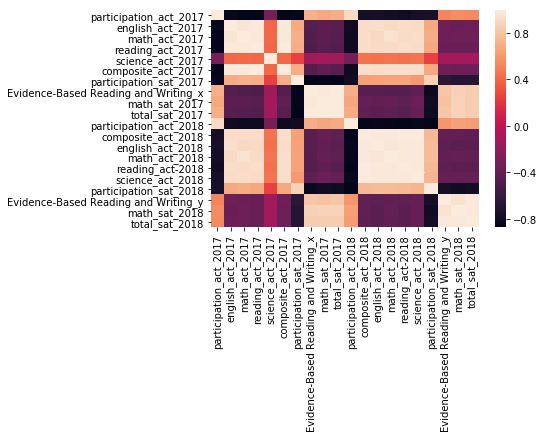

In [103]:
sns.heatmap(final.corr())

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [104]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [105]:
final.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017',
       'participation_sat_2017', 'Evidence-Based Reading and Writing_x',
       'math_sat_2017', 'total_sat_2017', 'participation_act_2018',
       'composite_act_2018', 'english_act_2018', 'math_act_2018',
       'reading_act-2018', 'science_act_2018', 'participation_sat_2018',
       'Evidence-Based Reading and Writing_y', 'math_sat_2018',
       'total_sat_2018'],
      dtype='object')

Plotting and Interpreting Participation rates for SAT & ACT using Histogram

In [106]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,8),sharex = True, sharey = False) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax=ax[i], bins=10, kde=True, fit=norm) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_titles[i])
       
        set# Set titles, labels, etc here for each subplot

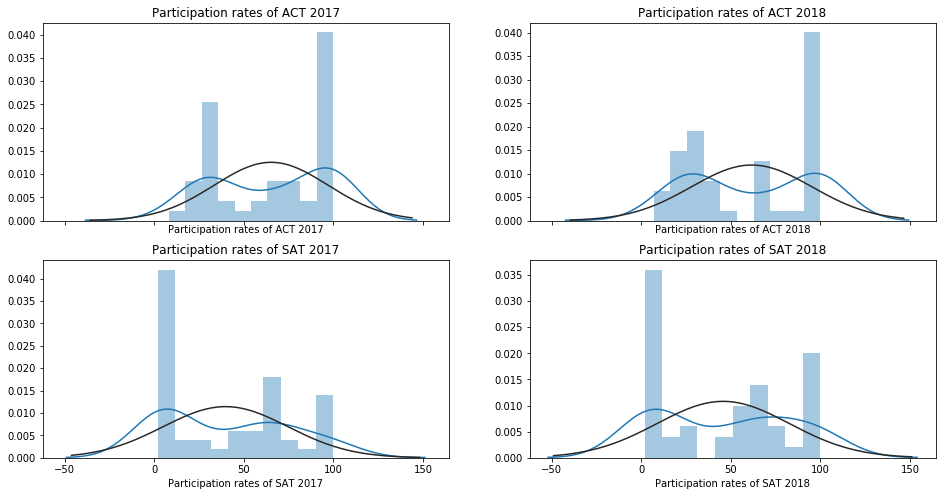

In [107]:
subplot_histograms(final,['participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018'],
                   ['Participation rates of ACT 2017','Participation rates of ACT 2018','Participation rates of SAT 2017','Participation rates of SAT 2018'],
                   ['ACT Participation','ACT Participation','SAT Participation','SAT Participation'])


Plotting and Interpreting Math scores for SAT & ACT using Histogram

In [108]:
def subplot_histogram(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,12),sharex = False, sharey = False) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax=ax[i], bins=10, kde=True, fit=norm) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_titles[i])
       
        set# Set titles, labels, etc here for each subplot

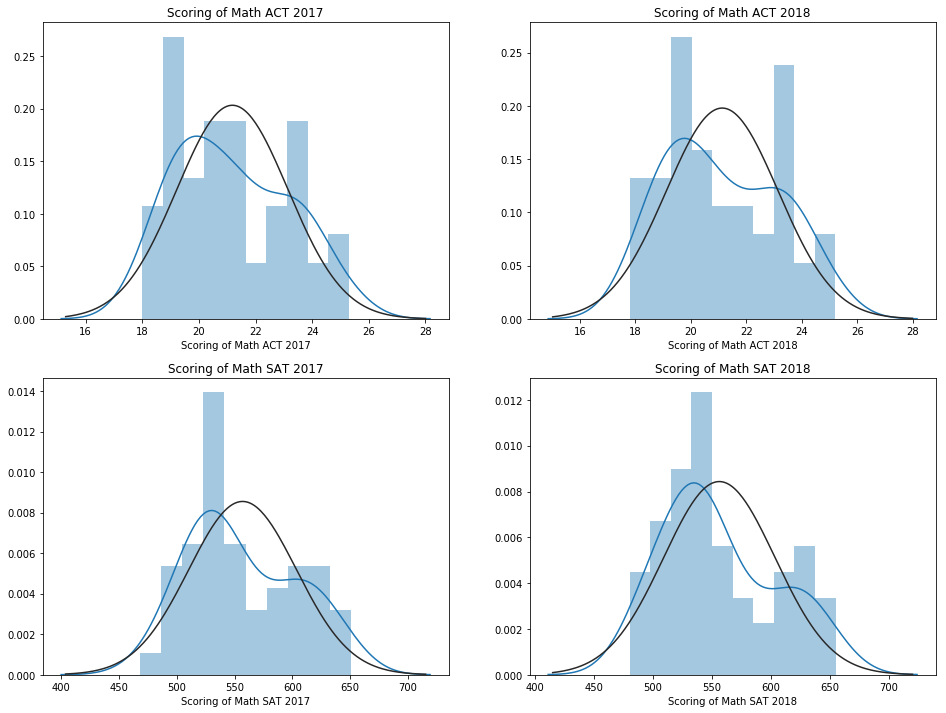

In [109]:
subplot_histogram(final,['math_act_2017','math_act_2018','math_sat_2017','math_sat_2018'],
                   ['Scoring of Math ACT 2017','Scoring of Math ACT 2018','Scoring of Math SAT 2017','Scoring of Math SAT 2018'],
                   ['ACT Participation','ACT Participation','SAT Participation','SAT Participation'])


Plotting and Interpreting Reading/verbal scores for SAT & ACT using Histogram

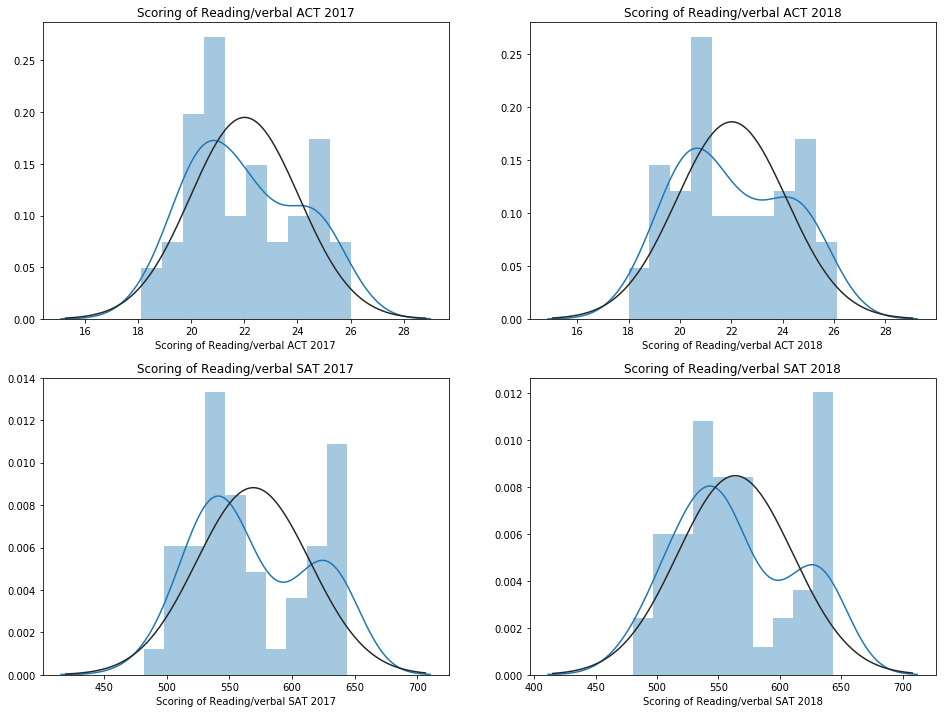

In [110]:
subplot_histogram(final,['reading_act_2017','reading_act-2018','Evidence-Based Reading and Writing_x','Evidence-Based Reading and Writing_y'],
                   ['Scoring of Reading/verbal ACT 2017','Scoring of Reading/verbal ACT 2018','Scoring of Reading/verbal SAT 2017','Scoring of Reading/verbal SAT 2018'],
                   ['ACT Participation','ACT Participation','SAT Participation','SAT Participation'])


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Plot and interpret scatter plots SAT vs. ACT math scores for 2017

Text(0.5, 1.0, 'SAT vs. ACT math scores for 2017')

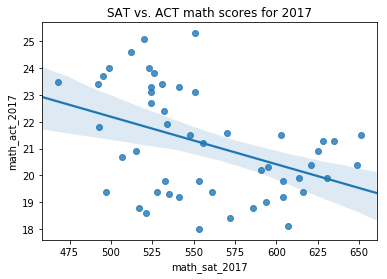

In [111]:
math_2017=sns.regplot(x=final['math_sat_2017'],y=final['math_act_2017'])
math_2017.set_title('SAT vs. ACT math scores for 2017')

Plot and interpret scatter plots SAT vs. ACT verbal/reading scores for 2017

Text(0.5, 1.0, ' SAT vs. ACT verbal/reading scores for 2017')

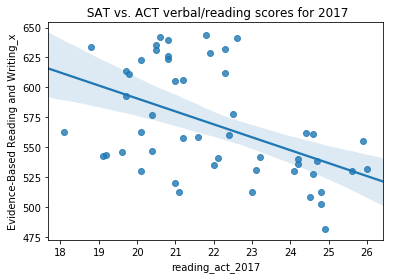

In [112]:
reading_2017 = sns.regplot(x = final['reading_act_2017'], y = final['Evidence-Based Reading and Writing_x'])
reading_2017.set_title(' SAT vs. ACT verbal/reading scores for 2017')

Plot and interpret scatter plots SAT vs. ACT total/composite scores for 2017

Text(0.5, 1.0, 'SAT vs. ACT total/composite scores for 2017')

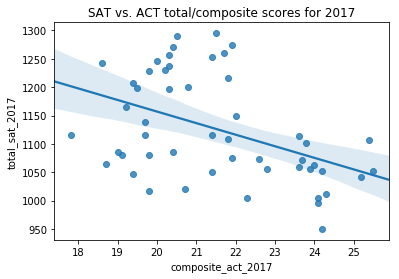

In [113]:
composite_2017=sns.regplot(x=final['composite_act_2017'], y=final['total_sat_2017'])
composite_2017.set_title('SAT vs. ACT total/composite scores for 2017')

Plot and interpret scatter plots Total scores for SAT 2017 vs. 2018

Text(0.5, 1.0, 'Total scores for SAT 2017 vs. 2018')

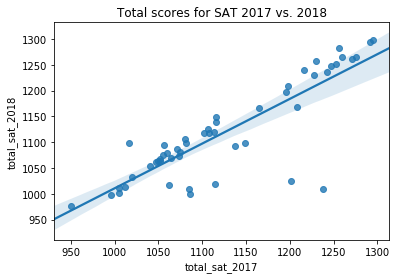

In [114]:
total_sat = sns.regplot(x = final['total_sat_2017'], y = final['total_sat_2018'])
total_sat.set_title('Total scores for SAT 2017 vs. 2018')

Plot and interpret scatter plots Composite scores for ACT 2017 vs. 2018

Text(0.5, 1.0, 'Composite scores for ACT 2017 vs. 2018')

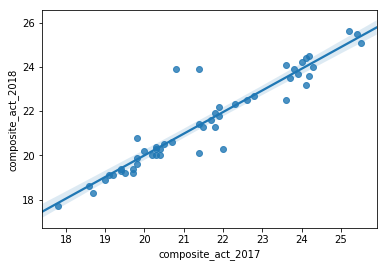

In [115]:
composite_act = sns.regplot(x = final['composite_act_2017'], y = final['composite_act_2018'])
total_sat.set_title('Composite scores for ACT 2017 vs. 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'Participation rate of ACT')

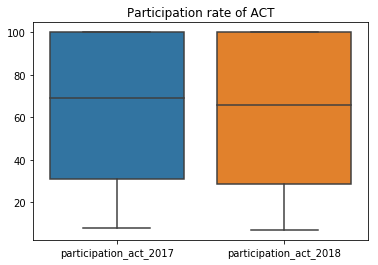

In [116]:
participant_act = final[['participation_act_2017', 'participation_act_2018',]]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Participation rate of ACT')

Text(0.5, 1.0, 'Participation Rate of SAT')

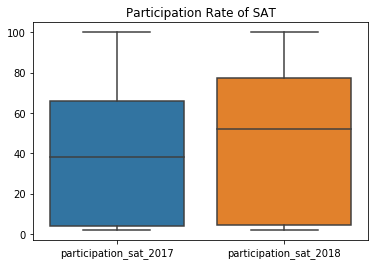

In [117]:
participant_act = final[['participation_sat_2017', 'participation_sat_2018',]]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Participation Rate of SAT')

Text(0.5, 1.0, 'Scores of ACT 2017')

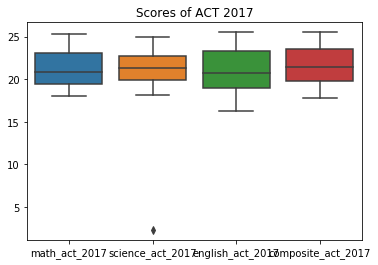

In [118]:
participant_act = final[['math_act_2017', 'science_act_2017','english_act_2017','composite_act_2017',]]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Scores of ACT 2017')

Text(0.5, 1.0, 'Scores of ACT 2017')

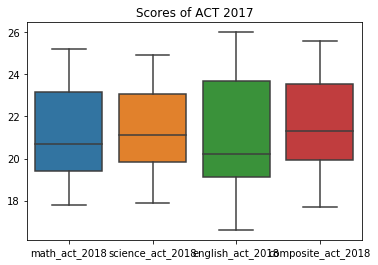

In [119]:
participant_act = final[['math_act_2018', 'science_act_2018','english_act_2018','composite_act_2018',]]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Scores of ACT 2017')

Text(0.5, 1.0, 'Scores of SAT 2017')

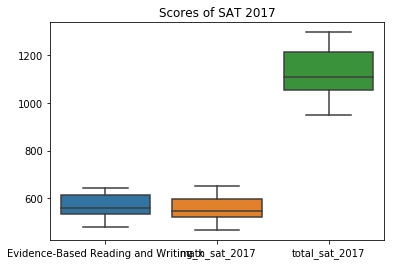

In [120]:
participant_act = final[['Evidence-Based Reading and Writing_x', 'math_sat_2017','total_sat_2017',]]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Scores of SAT 2017')

Text(0.5, 1.0, 'Scores of SAT 2018')

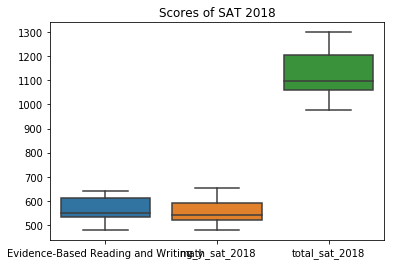

In [121]:
participant_act = final[['Evidence-Based Reading and Writing_y', 'math_sat_2018','total_sat_2018',]]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Scores of SAT 2018')

In [122]:
final.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017',
       'participation_sat_2017', 'Evidence-Based Reading and Writing_x',
       'math_sat_2017', 'total_sat_2017', 'participation_act_2018',
       'composite_act_2018', 'english_act_2018', 'math_act_2018',
       'reading_act-2018', 'science_act_2018', 'participation_sat_2018',
       'Evidence-Based Reading and Writing_y', 'math_sat_2018',
       'total_sat_2018'],
      dtype='object')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

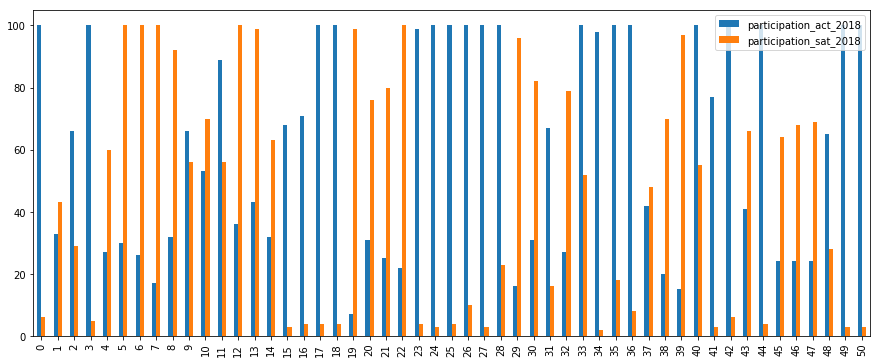

In [123]:
final[['participation_act_2018','participation_sat_2018']].plot(figsize=(15,6),kind ='bar');

From the above graph we can say the participation of ACT is more than the Participation of SAT.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [124]:
final[['participation_act_2017','composite_act_2017']].describe()

,participation_act_2017,composite_act_2017
count,51.000000,51.000000
mean,65.254902,21.519608
std,32.140842,2.020695
min,8.000000,17.800000
25%,31.000000,19.800000
50%,69.000000,21.400000
75%,100.000000,23.600000
max,100.000000,25.500000


In [125]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,6),sharex = False, sharey = False) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    fig = plt.figure(figsize=(8,5))
     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax=ax[i], bins=10, kde=True, fit=norm) # feel free to add more settings
        single_mean = dataframe[column].mean()
        single_sem = dataframe[column].std()/(len(dataframe[column]))**0.5 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_titles[i])
        ax[i].axvline(single_mean, linewidth=4, ls='dashed', c='black')   
       
        set# Set titles, labels, etc here for each subplot

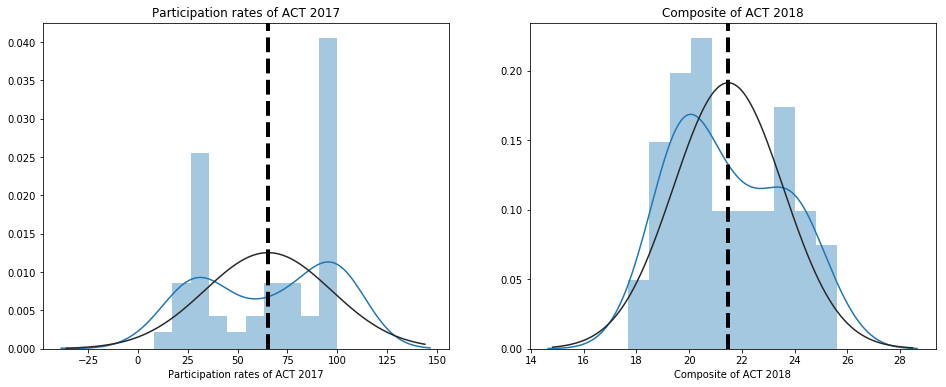

<Figure size 576x360 with 0 Axes>

In [126]:
subplot_histograms(final,['participation_act_2017','composite_act_2018'],
                   ['Participation rates of ACT 2017','Composite of ACT 2018'],
                   ['ACT Participation','Composite results'])


Text(0.5, 1.0, 'Statistics of Participation and Composite Result of ACT 2017')

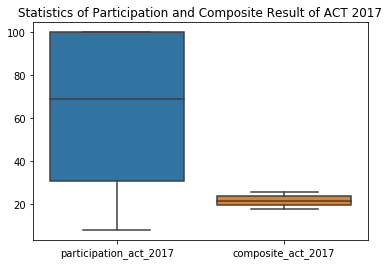

In [127]:
participant_act = final[['participation_act_2017', 'composite_act_2017']]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Statistics of Participation and Composite Result of ACT 2017')

In [128]:
import scipy.stats as stats

stats.normaltest(final['participation_act_2017'])

NormaltestResult(statistic=72.50510406893655, pvalue=1.8018419611696254e-16)

In [129]:
import scipy.stats as stats

stats.normaltest(final['composite_act_2017'])

NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: From the above plots and readings of pvalue, we can conclude that composite_act_2017 is normally distributed
whereas participation_act_2017 is not normally distributed.

From the graph and description, we can inference that the data of participation rate of ACT 2017 is widely spread from the mean value whereas composite score of ACT 2017 is aggregated towards the mean. So, the standard deviation of participation rate is more whereas the std deviation of composite act is less.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [130]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,6),sharex = False, sharey = False) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    fig = plt.figure(figsize=(8,5))
     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax=ax[i], bins=10, kde=True, fit=norm) # feel free to add more settings
        single_mean = dataframe[column].mean()
        single_sem = dataframe[column].std()/(len(dataframe[column]))**0.5 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_titles[i])
        ax[i].axvline(single_mean, linewidth=4, ls='dashed', c='black')   
       
        set# Set titles, labels, etc here for each subplot

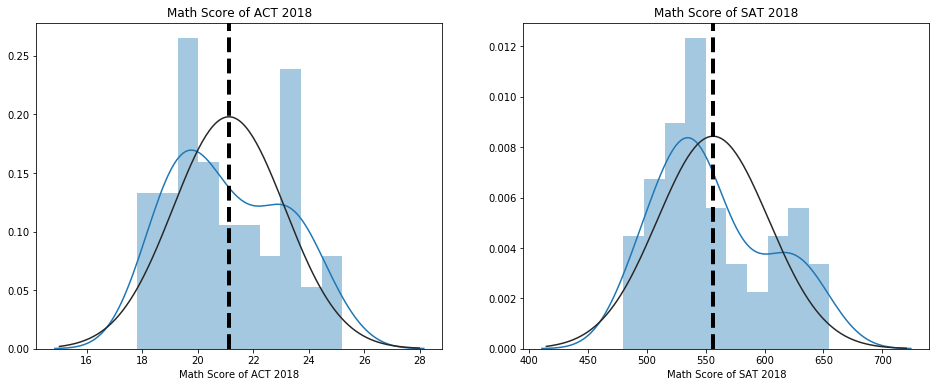

<Figure size 576x360 with 0 Axes>

In [131]:
subplot_histograms(final,['math_act_2018','math_sat_2018'],
                   ['Math Score of ACT 2018','Math Score of SAT 2018'],
                   ['ACT Participation','Composite results'])


Answer: When we see the math Act test and Math SAT test plot and pvalue,we can concludethat both are normally distributed.

In [132]:
final[['math_act_2017','math_sat_2017']].describe()

,math_act_2017,math_sat_2017
count,51.000000,51.000000
mean,21.182353,556.882353
std,1.981989,47.121395
min,18.000000,468.000000
25%,19.400000,523.500000
50%,20.900000,548.000000
75%,23.100000,599.000000
max,25.300000,651.000000


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Plotted in the graph

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:Yes, It is appropriate to compare SAT and ACT math scores as we can conclude the maximum and minimum marks of each test, their mean and their deviation from the mean score. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [133]:
import scipy.stats as stats

stats.normaltest(final['math_act_2018'])

NormaltestResult(statistic=9.493830792428861, pvalue=0.008678423456739134)

In [134]:
import scipy.stats as stats

stats.normaltest(final['math_sat_2018'])

NormaltestResult(statistic=4.8457529089366815, pvalue=0.08866620599134843)

In [135]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [136]:
final[((final['participation_act_2018'] == 100) & (final['composite_act_2018'] < 19))]

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
24,Mississippi,100,18.2,18.1,18.8,18.8,18.6,2,634,607,...,100,18.6,18.2,18.1,18.9,18.6,3,630,606,1236
28,Nevada,100,16.3,18.0,18.1,18.2,17.8,26,563,553,...,100,17.7,16.6,17.8,18.0,17.9,23,574,566,1140
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,...,100,18.3,17.3,18.2,18.6,18.5,55,547,523,1070


These states have made the ACT a mandatory part of their statewide testing regimens, helping high school students be better prepared for their college applications. This 3 states with 100% participation rates (i.e., states that require the ACT) tend to have lower averages than 21 as SAT is more popular in this states as the total score of SAT is more than average.

Text(0.5, 1.0, 'Statistics of Composite Result of ACT 2018')

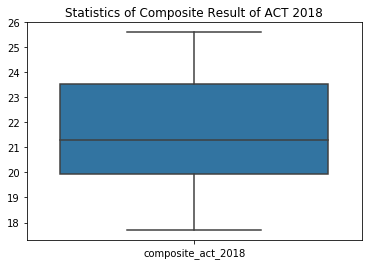

In [137]:
participant_act = final[['composite_act_2018']]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Statistics of Composite Result of ACT 2018')

Text(0.5, 1.0, 'Statistics of Total Result of SAT 2018')

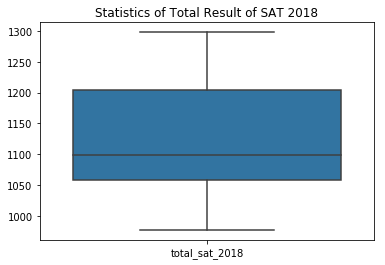

In [138]:
participant_act = final[['total_sat_2018']]
box_math_2017=sns.boxplot(data=participant_act)
box_math_2017.set_title('Statistics of Total Result of SAT 2018')

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [139]:
less_part_more_mark =final[((final['participation_act_2017']< 10) & (final['composite_act_2017']>21))]
less_part_more_mark

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,Evidence-Based Reading and Writing_x,math_sat_2017,...,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act-2018,science_act_2018,participation_sat_2018,Evidence-Based Reading and Writing_y,math_sat_2018,total_sat_2018
19,Maine,8,24.2,24.0,24.8,23.7,24.3,95,513,499,...,7,24.0,23.8,23.6,24.7,23.4,99,512,501,1013


In [140]:
final.iloc[19,:]

state                                   Maine
participation_act_2017                      8
english_act_2017                         24.2
math_act_2017                              24
reading_act_2017                         24.8
science_act_2017                         23.7
composite_act_2017                       24.3
participation_sat_2017                     95
Evidence-Based Reading and Writing_x      513
math_sat_2017                             499
total_sat_2017                           1012
participation_act_2018                      7
composite_act_2018                         24
english_act_2018                         23.8
math_act_2018                            23.6
reading_act-2018                         24.7
science_act_2018                         23.4
participation_sat_2018                     99
Evidence-Based Reading and Writing_y      512
math_sat_2018                             501
total_sat_2018                           1013
Name: 19, dtype: object

Many of Maine’s top colleges are test-optional and don’t require standardized test scores
By making the act and sat test as mandatory to get admission in the university, we can increase the number of particpants.